In [1]:
import jax
import jax.numpy as jnp
import jax.random as random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from abmax.structs import Params
from matplotlib.patches import FancyArrowPatch



import seaborn as sns
sns.set_theme(style="darkgrid")
palette = "viridis"
sns.set_palette(palette)

RENDER_DATA_PATH = "./data/"
MAX_SPAWN_X = 500.0 # max x in spawning arena
MAX_SPAWN_Y = MAX_SPAWN_X # max y in spawning arena
GRASS_RADIUS = 5.0
SHEEP_RADIUS = 5.0
EP_LEN = 500
NUM_SHEEP = 100
NUM_GRASS = 100


In [2]:
def render_one_traj(render_data):
    sheep_xs = render_data.content['sheep_xs'] #shape: (num_foragers, EP_LEN)
    sheep_ys = render_data.content['sheep_ys'] #shape: (num_foragers, EP_LEN)
    sheep_angs = render_data.content['sheep_angles'] #shape: (num_foragers, EP_LEN)
    grass_xs = render_data.content['grass_xs'] #shape: (num_patches, )
    grass_ys = render_data.content['grass_ys'] #shape: (num_patches, )
    grass_energies = render_data.content['grass_energies']#shape: (num_patches, EP_LEN)

    sheep_init_xs = forager_xs[0, :]
    sheep_init_ys = forager_ys[0, :]
    sheep_init_angs = forager_angs[0, :]
    grass_init_energies = patch_energies[0, :]

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(- 1.2*MAX_SPAWN_X, 1.2*MAX_SPAWN_X)
    ax.set_ylim(- 1.2*MAX_SPAWN_Y, 1.2*MAX_SPAWN_Y)
    ax.set_aspect('equal')
    
    # scatter plot of all grasses
    grass_scatter = ax.scatter(grass_xs, grass_ys, c='g', s=GRASS_RADIUS*4) # 15, when rad=10, 8 when rad = 7.5
    # scatter plot of all sheep
    sheep_scatter = ax.scatter(sheep_init_xs, sheep_init_ys, c='b', s=SHEEP_RADIUS*4)

    # create the quiver (arrow) with a scale to make it 50% smaller
    sheep_quiver = ax.quiver(sheep_init_xs, sheep_init_ys, jnp.cos(sheep_init_angs), jnp.sin(sheep_init_angs), color='b', scale=50.0)


    # Create text objects that will be updated
    def update(frame):
        grass_scatter.set_offsets(jnp.vstack((grass_xs, grass_ys)).T)
        sheep_scatter.set_offsets(jnp.vstack((sheep_xs[frame,:], sheep_ys[frame,:])).T)

        sheep_quiver.set_offsets(jnp.vstack((sheep_xs[frame,:], sheep_ys[frame,:])).T)
        sheep_quiver.set_UVC(jnp.cos(sheep_angs[frame,:]), jnp.sin(sheep_angs[frame,:])) # update direction components

        # Return all agents that need to be redrawn
        return sheep_scatter, sheep_quiver, grass_scatter
    
    ani = FuncAnimation(fig, update, frames=range(sheep_xs.shape[0]), blit=True)
    ani.save('./pred_prey_scatter.mp4', writer='ffmpeg', fps=60)

In [7]:
sheep_xs = jnp.load(RENDER_DATA_PATH + 'rendering_sheep_xs.npy')
sheep_ys = jnp.load(RENDER_DATA_PATH + 'rendering_sheep_ys.npy')
sheep_angs = jnp.load(RENDER_DATA_PATH + 'rendering_sheep_angs.npy')
grass_xs = jnp.load(RENDER_DATA_PATH + 'rendering_grass_xs.npy')
grass_ys = jnp.load(RENDER_DATA_PATH + 'rendering_grass_ys.npy')
grass_energies = jnp.load(RENDER_DATA_PATH + 'rendering_grass_energies.npy')

print(sheep_xs.shape, sheep_ys.shape, sheep_angs.shape, grass_xs.shape, grass_ys.shape, grass_energies.shape)


sheep_xs = jnp.reshape(sheep_xs, (sheep_xs.shape[0], EP_LEN, NUM_SHEEP))
sheep_ys = jnp.reshape(sheep_ys, (sheep_ys.shape[0], EP_LEN, NUM_SHEEP))
sheep_angs = jnp.reshape(sheep_angs, (sheep_angs.shape[0], EP_LEN, NUM_SHEEP))
grass_xs = jnp.reshape(grass_xs, (grass_xs.shape[0], NUM_GRASS))
grass_ys = jnp.reshape(grass_ys, (grass_ys.shape[0], NUM_GRASS))
grass_energies = jnp.reshape(grass_energies, (grass_energies.shape[0], EP_LEN, NUM_GRASS))

print(sheep_xs.shape, sheep_ys.shape, sheep_angs.shape, grass_xs.shape, grass_ys.shape, grass_energies.shape)

(10, 10, 500, 100, 1) (10, 10, 500, 100, 1) (10, 10, 500, 100, 1) (10, 10, 100) (10, 10, 100) (10, 10, 500, 100, 1)


TypeError: cannot reshape array of shape (10, 10, 500, 100, 1) (size 5000000) into shape (10, 500, 100) (size 500000)

In [3]:
sheep_xs = sheep_xs[-1]
sheep_ys = sheep_ys[-1]
sheep_angs = sheep_angs[-1]
grass_xs = grass_xs[-1]
grass_ys = grass_ys[-1]
grass_energies = grass_energies[-1]

print(sheep_xs.shape, sheep_ys.shape, sheep_angs.shape, grass_xs.shape, grass_ys.shape, grass_energies.shape)

render_data = Params(
    content={
        'sheep_xs': sheep_xs,
        'sheep_ys': sheep_ys,
        'sheep_angs': sheep_angs,
        'grass_xs': grass_xs,
        'grass_ys': grass_ys,
        'grass_energies': grass_energies
    }
)
print(render_data.content['forager_xs'].shape, render_data.content['forager_ys'].shape, render_data.content['forager_angs'].shape, render_data.content['patch_xs'].shape, render_data.content['patch_ys'].shape, render_data.content['patch_energies'].shape)


(2, 5000, 300, 1) (2, 5000, 300, 1) (2, 5000, 300, 1) (2, 400) (2, 400) (2, 5000, 400, 1)
(2, 5000, 300) (2, 5000, 300) (2, 5000, 300) (2, 400) (2, 400) (2, 5000, 400)
(5000, 300) (5000, 300) (5000, 300) (400,) (400,) (5000, 400)
(5000, 300) (5000, 300) (5000, 300) (400,) (400,) (5000, 400)


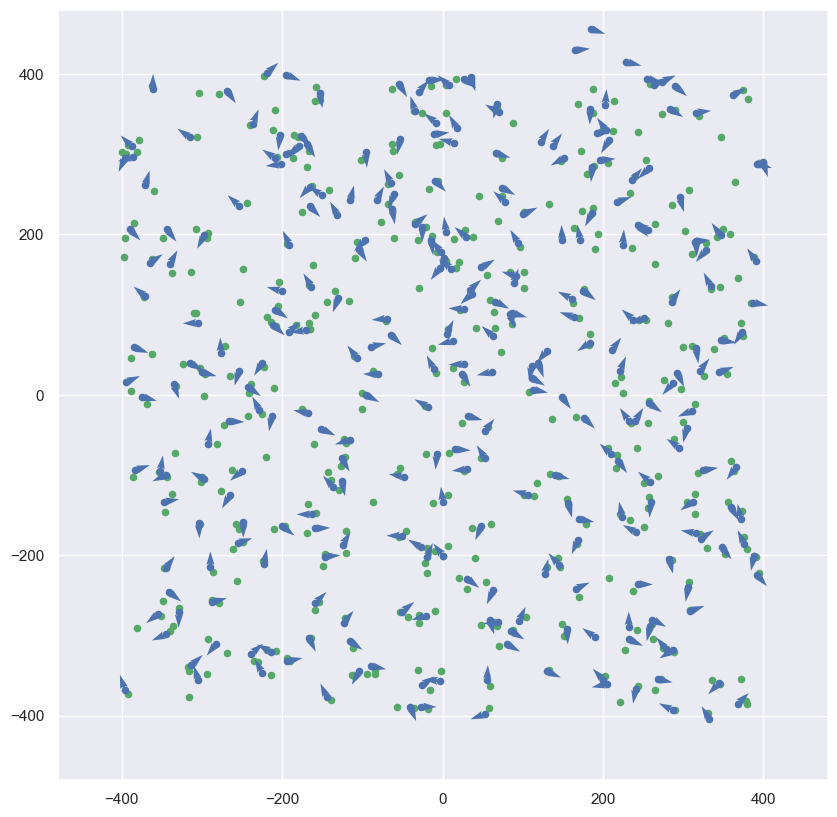

In [10]:
render_one_traj(render_data)

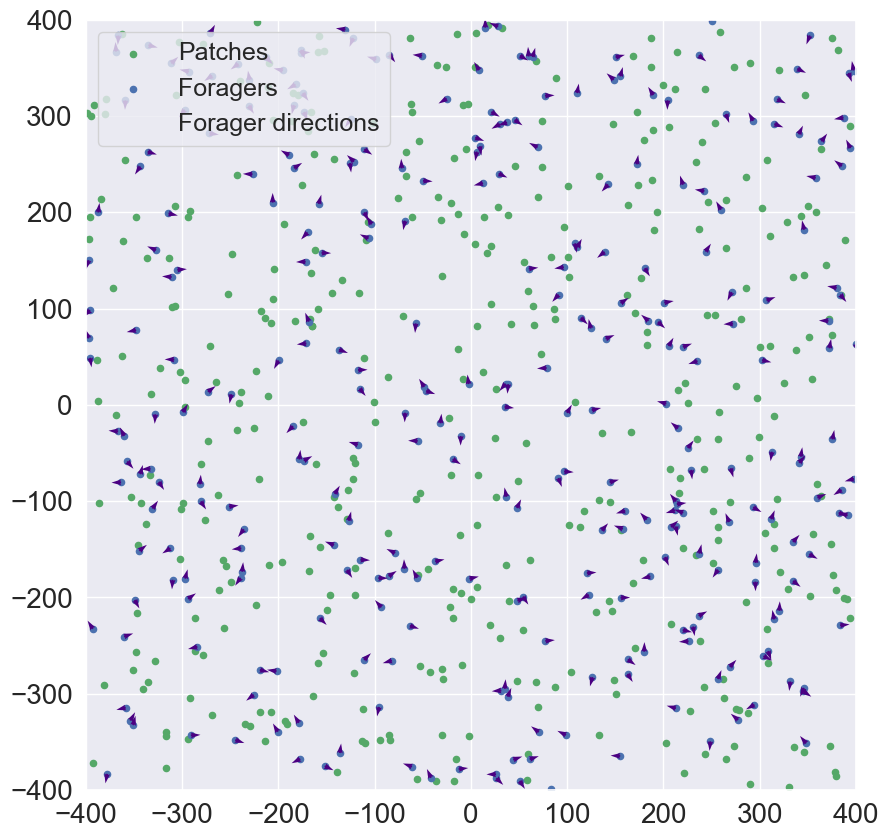

In [18]:
sheep_xs = render_data.content['sheep_xs'] #shape: (num_foragers, EP_LEN)
sheep_ys = render_data.content['sheep_ys'] #shape: (num_foragers, EP_LEN)
sheep_angs = render_data.content['sheep_angles'] #shape: (num_foragers, EP_LEN)
grass_xs = render_data.content['grass_xs'] #shape: (num_patches, )
grass_ys = render_data.content['grass_ys'] #shape: (num_patches, )
grass_energies = render_data.content['grass_energies']#shape: (num_patches, EP_LEN)

sheep_init_xs = forager_xs[0, :]
sheep_init_ys = forager_ys[0, :]
sheep_init_angs = forager_angs[0, :]
grass_init_energies = patch_energies[0, :]



fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(- MAX_SPAWN_X, MAX_SPAWN_X)
ax.set_ylim(- MAX_SPAWN_Y, MAX_SPAWN_Y)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_aspect('equal')

patch_scatter = ax.scatter(grass_xs, grass_ys, c='g', s=GRASS_RADIUS*4, label='Patches')

#sheep_scatter = ax.scatter(sheep_init_xs, sheep_init_ys, c='b', s=SHEEP_RADIUS*4, alpha=0.3, edgecolors='black', linewidths=1.5)

sheep_scatter = ax.scatter(sheep_init_xs, sheep_init_ys, c='b', s=SHEEP_RADIUS*4, label='Sheep')
sheep_quiver = ax.quiver(sheep_init_xs, sheep_init_ys, jnp.cos(sheep_init_angs), jnp.sin(sheep_init_angs), color='indigo', scale=80.0)

#sheep_ghost_triangle = ax.arrow(0.0,0.0,0.0,0.0,head_width=2.0, head_length=2.0, fc='indigo', ec='indigo', label='Sheep Direction')
# make a ghost indigo triangle for the quiver legend
arrow_patch = FancyArrowPatch((0, 0), (1, 0),
                            color='indigo', alpha = 0.0,
                            mutation_scale=15,  # Controls arrow head size
                            linewidth=1.5,
                            arrowstyle='->', label='Forager Direction')
#legend
#ax.legend(loc='upper left',fontsize=18)
ax.legend([patch_scatter, sheep_scatter, arrow_patch],
          ['Patches', 'Foragers', 'Forager directions'],
          loc='upper left', fontsize=18)
plt.savefig('./pred_prey_scatter.svg', bbox_inches='tight')

#plt.show()
